In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

### 데이터 전처리

In [31]:
df_trend_2023_gangwon = pd.read_csv("20240305141822_여행유형_트렌드 언급량.csv", encoding='cp949')
df_trend_2023_gangwon

,기준연월,여행유형/트렌드명,언급건수
0,202308,레포츠,76583
1,202307,레포츠,68839
2,202306,레포츠,66655
3,202310,레포츠,62684
4,202305,레포츠,53744
5,202309,레포츠,52763
6,202308,휴식/힐링,51389
7,202310,휴식/힐링,50282
8,202312,레포츠,50256
9,202311,레포츠,49295


In [32]:
df_trend_2023_gangwon.isnull().sum()

기준연월         0
여행유형/트렌드명    0
언급건수         0
dtype: int64

### 데이터 가공

In [33]:
df_trend_2023_gangwon['지역구분'] = '강원'
df_trend_2023_gangwon

,기준연월,여행유형/트렌드명,언급건수,지역구분
0,202308,레포츠,76583,강원
1,202307,레포츠,68839,강원
2,202306,레포츠,66655,강원
3,202310,레포츠,62684,강원
4,202305,레포츠,53744,강원
5,202309,레포츠,52763,강원
6,202308,휴식/힐링,51389,강원
7,202310,휴식/힐링,50282,강원
8,202312,레포츠,50256,강원
9,202311,레포츠,49295,강원


In [38]:
condition_jan = "기준연월 == 202301"
condition_feb = "기준연월 == 202302"
condition_mar = "기준연월 == 202303"
condition_apr = "기준연월 == 202304"
condition_may = "기준연월 == 202305"
condition_jun = "기준연월 == 202306"
condition_jul = "기준연월 == 202307"
condition_aug = "기준연월 == 202308"
condition_sep = "기준연월 == 202309"
condition_oct = "기준연월 == 202310"
condition_nov = "기준연월 == 202311"
condition_dec = "기준연월 == 202312"

df_trend_2023_gangwon_jan = df_trend_2023_gangwon.query(condition_jan)
df_trend_2023_gangwon_feb = df_trend_2023_gangwon.query(condition_feb)
df_trend_2023_gangwon_mar = df_trend_2023_gangwon.query(condition_mar)
df_trend_2023_gangwon_apr = df_trend_2023_gangwon.query(condition_apr)
df_trend_2023_gangwon_may = df_trend_2023_gangwon.query(condition_may)
df_trend_2023_gangwon_jun = df_trend_2023_gangwon.query(condition_jun)
df_trend_2023_gangwon_jul = df_trend_2023_gangwon.query(condition_jul)
df_trend_2023_gangwon_aug = df_trend_2023_gangwon.query(condition_aug)
df_trend_2023_gangwon_sep = df_trend_2023_gangwon.query(condition_sep)
df_trend_2023_gangwon_oct = df_trend_2023_gangwon.query(condition_oct)
df_trend_2023_gangwon_nov = df_trend_2023_gangwon.query(condition_nov)
df_trend_2023_gangwon_dec = df_trend_2023_gangwon.query(condition_dec)

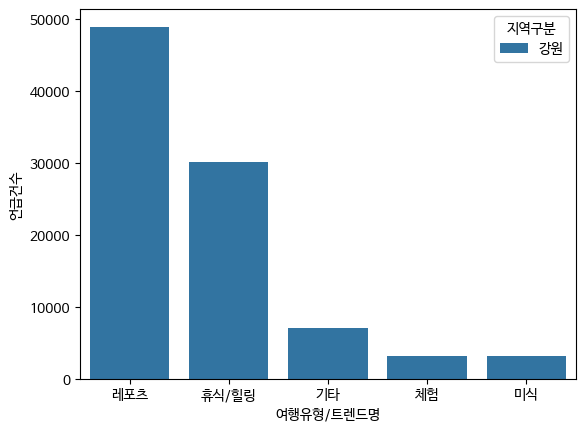

In [48]:
# 1월 
sns.barplot(data = df_trend_2023_gangwon_jan.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

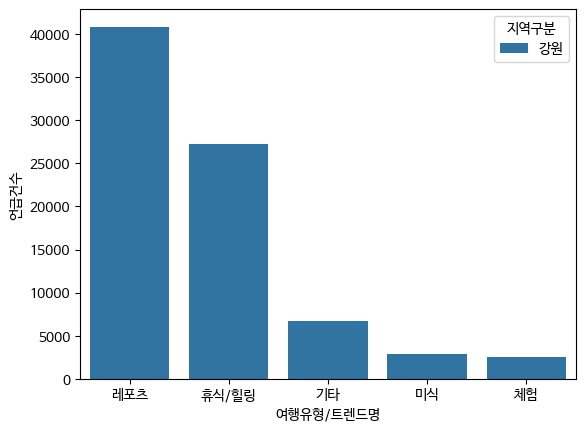

In [49]:
# 2월
sns.barplot(data = df_trend_2023_gangwon_feb.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

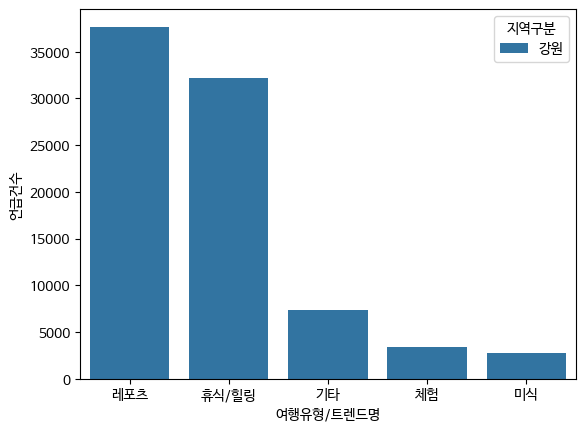

In [50]:
# 3월 
sns.barplot(data = df_trend_2023_gangwon_mar.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

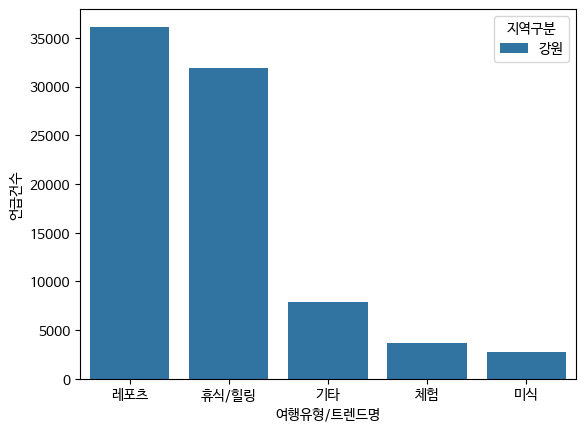

In [51]:
# 4월 
sns.barplot(data = df_trend_2023_gangwon_apr.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

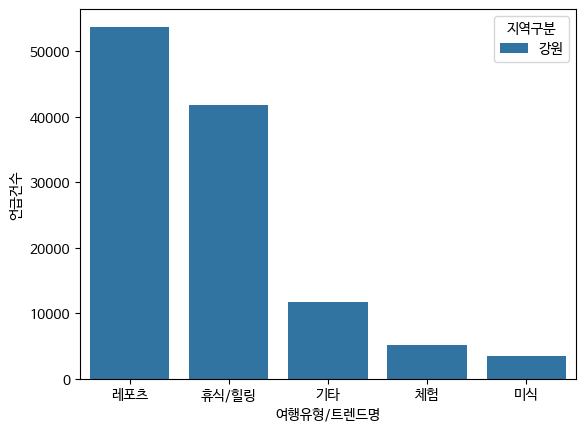

In [52]:
# 5월 
sns.barplot(data = df_trend_2023_gangwon_may.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

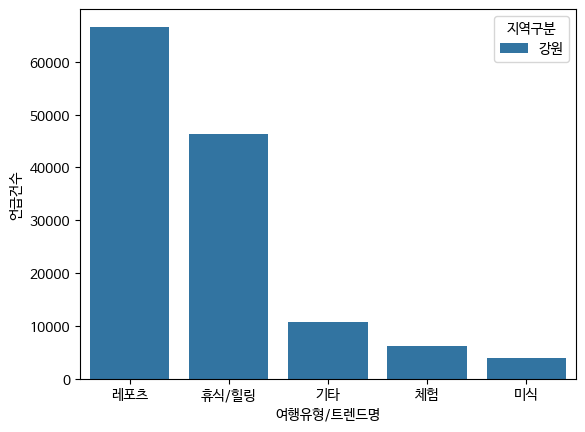

In [53]:
# 6월 
sns.barplot(data = df_trend_2023_gangwon_jun.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

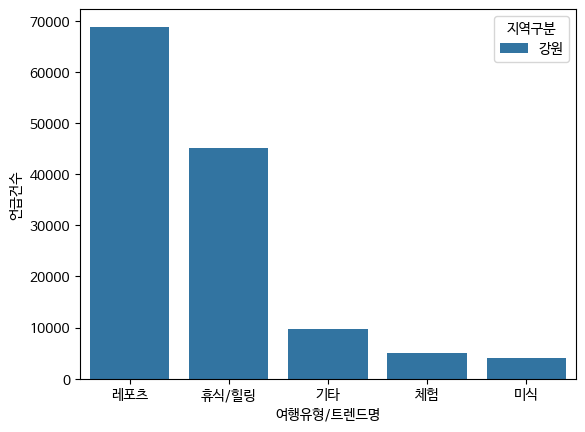

In [54]:
# 7월 
sns.barplot(data = df_trend_2023_gangwon_jul.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

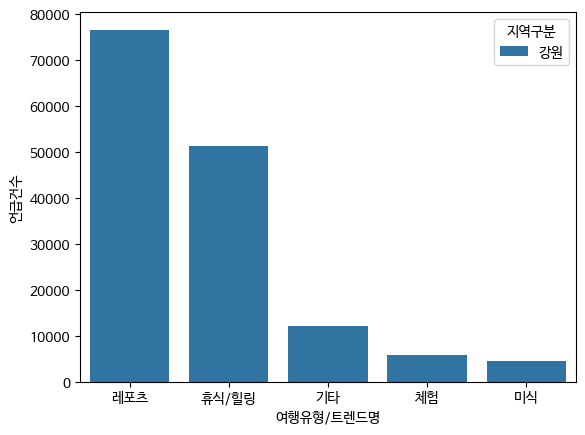

In [55]:
# 8월 
sns.barplot(data = df_trend_2023_gangwon_aug.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

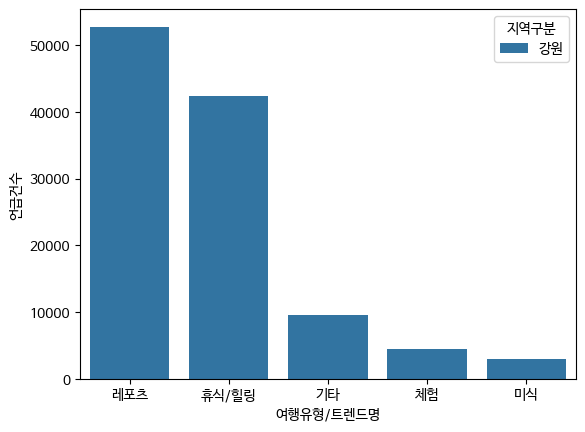

In [56]:
# 9월 
sns.barplot(data = df_trend_2023_gangwon_sep.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

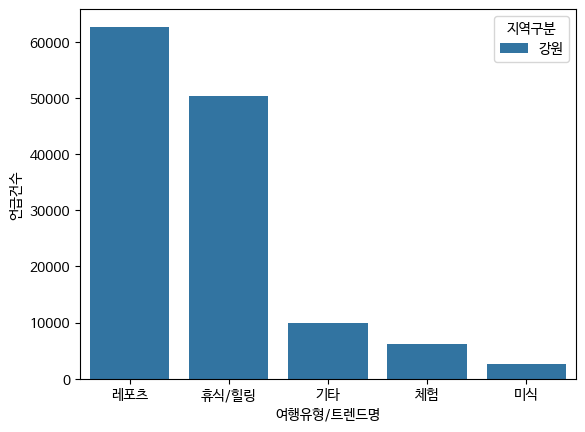

In [57]:
# 10월 
sns.barplot(data = df_trend_2023_gangwon_oct.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

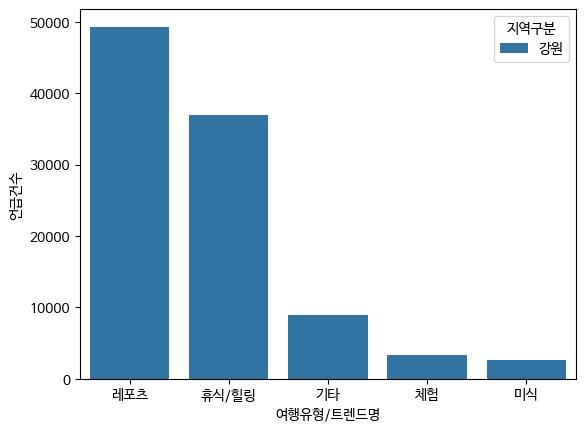

In [58]:
# 11월 
sns.barplot(data = df_trend_2023_gangwon_nov.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

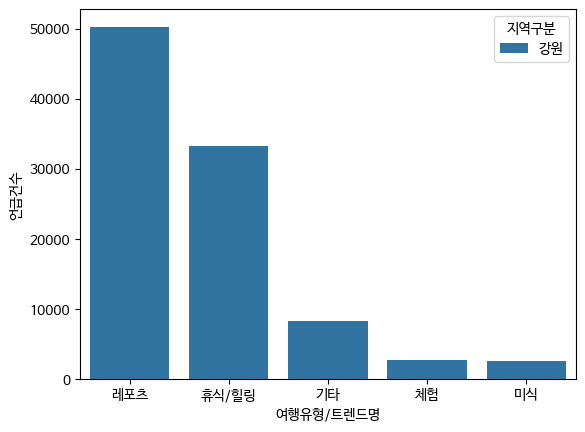

In [59]:
# 12월 
sns.barplot(data = df_trend_2023_gangwon_dec.sort_values(by = "언급건수", ascending = False), x="여행유형/트렌드명", y="언급건수", hue="지역구분")
plt.show()

### insight
- 2023년 강원 트렌드 언급건수 : 월별로 레포츠 > 휴식/힐링 > 기타 > 체험 > 미식
- 접근전략 : 강원도는 레포츠 또는 휴식/힐링 트렌드를 위주로 여행 추천